In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris=pd.read_csv("iris1.csv",sep=',')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<AxesSubplot:>

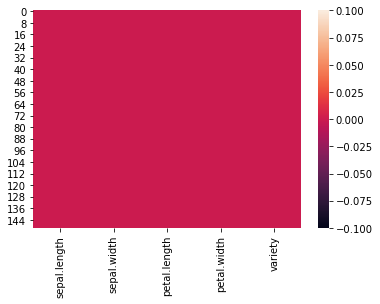

In [7]:
sns.heatmap(iris.isnull())

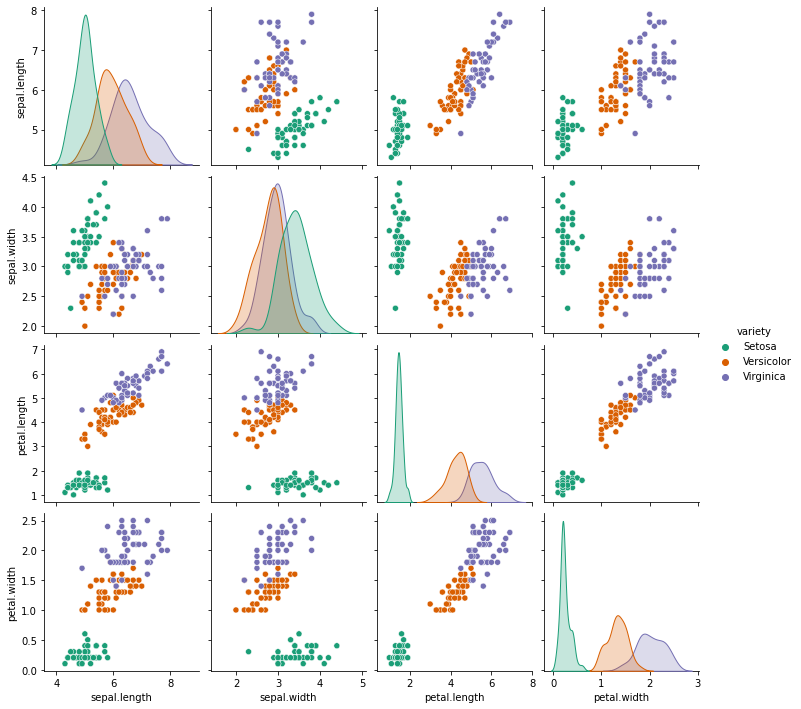

In [8]:
# Setosa is the most separable. 
sns.pairplot(iris,hue='variety',palette='Dark2')

<AxesSubplot:xlabel='sepal.width', ylabel='sepal.length'>

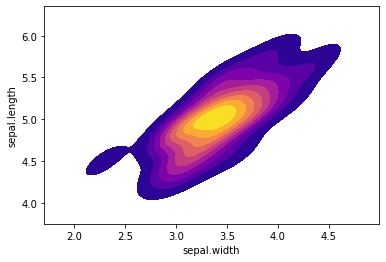

In [9]:
Setosa = iris[iris['variety']=='Setosa']
sns.kdeplot( Setosa['sepal.width'], Setosa['sepal.length'],
                 cmap="plasma", shade=True, shade_lowest=False)

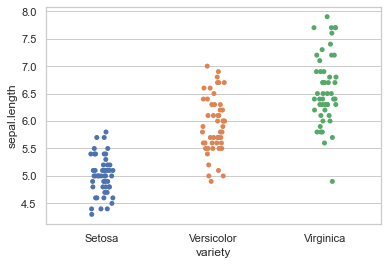

In [10]:
sns.set(style="whitegrid")
ax=sns.stripplot(x='variety',y='sepal.length',data=iris)
plt.show()

In [11]:
#Skewness is acceptable upto 0.55
iris.skew()

sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64

TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = iris.drop('variety',axis=1)
y = iris['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

TRAIN A MODEL AND MODEL EVALUATION

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

Accuracy score of LogisticRegression() is:
1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00        14
   Virginica       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy score of GaussianNB() is:
0.9777777777777777
[[12  0  0]
 [ 0 13  1]
 [ 0  0 19]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.93      0.96        14
   Virginica       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Accuracy score of SVC() is:
0.9333333333333333
[[12  0  0]


SUPPORT VECTOR MACHINE IS THE BEST MODEL IN THIS DATASET BECAUSE OF HIGH ACCURACY SCORE
AND IN TERMS OF CONFUSION MATRIX ALSO IT IS COMPARITIVELY SHOW BETTER RESULTS BY GIVING ONLY 1(FALSE NEGATIVE VALUE) ERROR WHILE PREDICTING VIRGINICA